msk-redefining-cancer-treatment

Personalized Medicine: Redefining Cancer Treatment | Kaggle
=============================

In [1]:
from sklearn import *
import sklearn
import pandas as pd
import numpy as np
import xgboost as xgb

from sklearn.metrics import log_loss                                                         
from sklearn.ensemble import RandomForestClassifier                                             
from sklearn.model_selection import KFold                                                       
#from sklearn.metrics import accuracy_score   

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

train = pd.read_csv('../input/training_variants')
test = pd.read_csv('../input/test_variants')
trainx = pd.read_csv('../input/training_text', sep="\|\|", engine='python', header=None, skiprows=1, names=["ID","Text"])
testx = pd.read_csv('../input/test_text', sep="\|\|", engine='python', header=None, skiprows=1, names=["ID","Text"])


/home/yannisplab/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/yannisplab/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/home/yannisplab/anaconda3/lib/python3.6/site-packages/sklearn/lda.py:6: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", Depre

In [ ]:
train = pd.merge(train, trainx, how='left', on='ID').fillna('')
y = train['Class'].values
train = train.drop(['Class'], axis=1)

test = pd.merge(test, testx, how='left', on='ID').fillna('')
pid = test['ID'].values

if 1st time, uncomment below and comment next cell

In [2]:
# df_all = pd.concat((train, test), axis=0, ignore_index=True)
# df_all['Gene_Share'] = df_all.apply(lambda r: sum([1 for w in r['Gene'].split(' ') if w in r['Text'].split(' ')]), axis=1)
# df_all['Variation_Share'] = df_all.apply(lambda r: sum([1 for w in r['Variation'].split(' ') if w in r['Text'].split(' ')]), axis=1)

# #commented for Kaggle Limits
# for i in range(56):
#     df_all['Gene_'+str(i)] = df_all['Gene'].map(lambda x: str(x[i]) if len(x)>i else '')
#     df_all['Variation'+str(i)] = df_all['Variation'].map(lambda x: str(x[i]) if len(x)>i else '')


# gen_var_lst = sorted(list(train.Gene.unique()) + list(train.Variation.unique()))
# print(len(gen_var_lst))
# gen_var_lst = [x for x in gen_var_lst if len(x.split(' '))==1]
# print(len(gen_var_lst))
# i_ = 0
# #commented for Kaggle Limits
# for gen_var_lst_itm in gen_var_lst:
#     if i_ % 100 == 0: print(i_)
#     df_all['GV_'+str(gen_var_lst_itm)] = df_all['Text'].map(lambda x: str(x).count(str(gen_var_lst_itm)))
#     i_ += 1

# for c in df_all.columns:
#     if df_all[c].dtype == 'object':
#         if c in ['Gene','Variation']:
#             lbl = preprocessing.LabelEncoder()
#             df_all[c+'_lbl_enc'] = lbl.fit_transform(df_all[c].values)  
#             df_all[c+'_len'] = df_all[c].map(lambda x: len(str(x)))
#             df_all[c+'_words'] = df_all[c].map(lambda x: len(str(x).split(' ')))
#         elif c != 'Text':
#             lbl = preprocessing.LabelEncoder()
#             df_all[c] = lbl.fit_transform(df_all[c].values)
#         if c=='Text': 
#             df_all[c+'_len'] = df_all[c].map(lambda x: len(str(x)))
#             df_all[c+'_words'] = df_all[c].map(lambda x: len(str(x).split(' '))) 



#df_all.to_csv('df_all.csv')


3260
3091
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000


if 2nd time run, comment above and use below

In [57]:
#if 2nd time run, comment above
df_all= pd.read_csv('df_all.csv').drop(df_all.columns[0], axis=1)
print(df_all.shape)#(8989, 3217)
summary=df_all.describe()
# summary.to_csv('summary.csv')
summary

(8989, 3217)


,ID,Gene_Share,Variation_Share,Gene_0,Variation0,Gene_1,Variation1,Gene_2,Variation2,Gene_3,...,GV_YAP1,GV_p61BRAF,Gene_lbl_enc,Gene_len,Gene_words,Variation_lbl_enc,Variation_len,Variation_words,Text_len,Text_words
count,8989.000000,8989.000000,8989.000000,8989.000000,8989.000000,8989.000000,8989.000000,8989.000000,8989.000000,8989.000000,...,8989.000000,8989.000000,8989.000000,8989.000000,8989.0,8989.000000,8989.000000,8989.000000,8989.000000,8989.000000
mean,2399.948604,0.359328,0.815775,9.350873,16.880187,19.078095,6.105796,17.844699,8.071866,12.848036,...,0.366448,0.017800,700.801201,4.564913,1.0,4271.975971,5.742797,1.036823,59063.762042,8905.540550
std,1532.553437,0.479830,0.423356,6.876197,6.422781,7.303647,7.438880,7.648407,7.744326,10.791715,...,6.402976,0.460156,432.263522,1.174447,0.0,2514.680898,3.070985,0.217404,37051.380894,5597.929867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,1.0,0.000000,3.000000,1.000000,4.000000,1.000000
25%,1123.000000,0.000000,1.000000,2.000000,11.000000,12.000000,2.000000,12.000000,4.000000,3.000000,...,0.000000,0.000000,321.000000,4.000000,1.0,2068.000000,5.000000,1.000000,37955.000000,5700.000000
50%,2247.000000,0.000000,1.000000,10.000000,17.000000,20.000000,4.000000,17.000000,7.000000,12.000000,...,0.000000,0.000000,680.000000,4.000000,1.0,4259.000000,5.000000,1.000000,53101.000000,8040.000000
75%,3420.000000,1.000000,1.000000,15.000000,22.000000,26.000000,7.000000,24.000000,9.000000,24.000000,...,0.000000,0.000000,1076.000000,5.000000,1.0,6484.000000,5.000000,1.000000,70410.000000,10598.000000
max,5667.000000,1.000000,5.000000,25.000000,31.000000,34.000000,44.000000,35.000000,44.000000,37.000000,...,321.000000,22.000000,1506.000000,9.000000,1.0,8608.000000,55.000000,6.000000,523393.000000,77202.000000


In [58]:
df=df_all.iloc[:,4:]
#df_std=df_all.std()
print(df.shape)
df_drop=df.loc[:, (df.std()< 0.001)]
print(df_drop.shape)
#print(df_drop.columns)
dfnew=df_all.drop(df_drop.columns, axis=1)
print(dfnew.shape)

(8989, 3213)
(8989, 586)
(8989, 2631)


In [59]:
df_all=dfnew
print(df_all.shape)

#remove all column which are 0s in train
train = df_all.iloc[:len(train)]
test = df_all.iloc[len(train):]

train2=train.loc[:, (train != 0).any(axis=0)]
print (train2.shape)

test=test.loc[:, (train != 0).any(axis=0)]
print (test.shape)
train=train2

# print(train.shape)
# print(test.shape)
# (8989, 2631)
# (3321, 2623)
# (5668, 2623)


(8989, 2631)
(3321, 2623)
(5668, 2623)


## How to use text information

In [60]:
class cust_regression_vals(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin):
    def fit(self, x, y=None):
        return self
    def transform(self, x):
        x = x.drop(['Gene', 'Variation','ID','Text'],axis=1).values
        return x

class cust_txt_col(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin):
    def __init__(self, key):
        self.key = key
    def fit(self, x, y=None):
        return self
    def transform(self, x):
        return x[self.key].apply(str)

# # stop_words='english', #stop_words='stopWords',
# train = fp.fit_transform(train); print(train.shape)
# test = fp.transform(test); print(test.shape)
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as esw
stopWords = ["fig", "figure", "et", "al", "table",  
        "data", "analysis", "analyze", "study",  
        "method", "result", "conclusion", "author",  
        "find", "found", "show", "perform",  
        "demonstrate", "evaluate", "discuss", "google", "scholar",   
        "pubmed",  "web", "science", "crossref", "supplementary"] + list(esw) 

type(stopWords)

list

##  how CountVectorizer work

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer
# v = CountVectorizer(ngram_range=(1, 2))
# print(v.fit(["an apple a day keeps the doctor away"]).vocabulary_)

# v = CountVectorizer(ngram_range=(2, 2))
# print(v.fit(["an apple a day keeps the doctor away"]).vocabulary_)

# v = CountVectorizer(ngram_range=(1, 1))
# print(v.fit(["an apple a day keeps the doctor away"]).vocabulary_)

# v = CountVectorizer(ngram_range=(3, 3))
# print(v.fit(["an apple a day keeps the doctor away"]).vocabulary_)

In [64]:
print('Pipeline...')

fp = pipeline.Pipeline([
    ('union', pipeline.FeatureUnion(
        n_jobs = -1,
        transformer_list = [
            ('standard', cust_regression_vals()),
            ('pi1', pipeline.Pipeline([('Gene', cust_txt_col('Gene')), ('count_Gene', feature_extraction.text.CountVectorizer(analyzer=u'char', ngram_range=(1, 8))), ('tsvd1', decomposition.TruncatedSVD(n_components=20, n_iter=25, random_state=12))])),
            ('pi2', pipeline.Pipeline([('Variation', cust_txt_col('Variation')), ('count_Variation', feature_extraction.text.CountVectorizer(analyzer=u'char', ngram_range=(1, 8))), ('tsvd2', decomposition.TruncatedSVD(n_components=20, n_iter=25, random_state=12))])),
            #commented for Kaggle Limits
            ('pi3', pipeline.Pipeline([('Text1', cust_txt_col('Text')), ('tfidf_Text1', feature_extraction.text.TfidfVectorizer(stop_words=stopWords,ngram_range=(1, 1))), ('tsvd3', decomposition.TruncatedSVD(n_components=50, n_iter=25, random_state=12))])),
            #commented for Kaggle Limits
            ('pi4', pipeline.Pipeline([('Text2', cust_txt_col('Text')), ('tfidf_Text2', feature_extraction.text.TfidfVectorizer(stop_words=stopWords,ngram_range=(2, 2))), ('tsvd4', decomposition.TruncatedSVD(n_components=50, n_iter=25, random_state=12))])),
            #commented for Kaggle Limits
            ('pi5', pipeline.Pipeline([('Text3', cust_txt_col('Text')), 
                                       ('hv', feature_extraction.text.HashingVectorizer(stop_words=stopWords,decode_error='ignore', n_features=2 ** 18, non_negative=True, ngram_range=(3, 3))),
                                       ('tfidf_Text3', feature_extraction.text.TfidfTransformer()), 
                                       ('tsvd5', decomposition.TruncatedSVD(n_components=200, n_iter=25, random_state=12))]))
#             ('pi5', pipeline.Pipeline([('Text3', cust_txt_col('Text')), ('tfidf_Text3', feature_extraction.text.TfidfVectorizer(stop_words=stopWords,ngram_range=(3, 3))), ('tsvd5', decomposition.TruncatedSVD(n_components=50, n_iter=25, random_state=12))]))
        ])
    )])
#if out of mempry, use the commented
# fp = pipeline.Pipeline([
#     ('union', pipeline.FeatureUnion(
#         n_jobs = -1,
#         transformer_list = [
#             ('standard', cust_regression_vals()),
#             ('pi1', pipeline.Pipeline([('Gene', cust_txt_col('Gene')), 
#                                        ('count_Gene', feature_extraction.text.CountVectorizer(analyzer=u'char', ngram_range=(1, 8))), 
#                                        ('tsvd1', decomposition.TruncatedSVD(n_components=20, n_iter=25, random_state=12))])),
#             ('pi2', pipeline.Pipeline([('Variation', cust_txt_col('Variation')), 
#                                        ('count_Variation', feature_extraction.text.CountVectorizer(analyzer=u'char', ngram_range=(1, 8))), 
#                                        ('tsvd2', decomposition.TruncatedSVD(n_components=20, n_iter=25, random_state=12))])),
#             #commented for Kaggle Limits
#             ('pi3', pipeline.Pipeline([('Text', cust_txt_col('Text')), 
#                                        ('hv', feature_extraction.text.HashingVectorizer(stop_words=stopWords,decode_error='ignore', n_features=2 ** 18, non_negative=True, ngram_range=(1, 3))),
#                                        ('tfidf_Text', feature_extraction.text.TfidfTransformer()), 
#                                        ('tsvd3', decomposition.TruncatedSVD(n_components=300, n_iter=25, random_state=12))]))

        
#         ])
#     )])


train = fp.fit_transform(train)
print (train.shape)

test_t = np.empty([0, train.shape[1]])
step = 500
for i in range(0, len(test), step):
    if i % 10 == 0: print(i)
    step_end = i+step
    step_end = step_end if step_end < len(test) else len(test)
    _test = fp.transform(test.iloc[i:step_end])
    test_t = np.vstack((test_t, _test))
test = test_t
print (test.shape)

Pipeline...
(3321, 2959)
0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
(5668, 2959)


In [65]:
if max(y)==9:
    y = y - 1 #fix for zero bound array
max(y) #fix for zero bound array

8

In [66]:
print(train.shape)
print(test.shape)

# # np.savetxt('train2734.txt', train)
# # np.savetxt('test2734.txt', test)
# np.savetxt('train2959.txt', train)
# np.savetxt('test2959.txt', test)

(3321, 2959)
(5668, 2959)


##  feature selection

In [ ]:
# train = np.loadtxt('train_629.txt')
# test = np.loadtxt('test_629.txt')

In [67]:
##feature selection by VarianceThreshold
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.00001))
tr_te=np.concatenate((train, test))
print(tr_te.shape)
tr_te=sel.fit_transform(tr_te)
print(tr_te.shape)

# train1 = tr_te[:len(train)]
# test1 = tr_te[len(train):]
# print(train1.shape)
# print(test1.shape)

train = tr_te[:len(train)]
test = tr_te[len(train):]

print(train.shape)
print(test.shape)

# np.savetxt('train2967.txt', train)
# np.savetxt('test2967.txt', test)


(8989, 2959)
(8989, 2959)
(3321, 2959)
(5668, 2959)


In [185]:
fold = 10#5
imp = np.zeros((fold, train.shape[1]))

for i in np.array(range(fold)):
    rf = RandomForestClassifier(n_jobs=-1,n_estimators=50,oob_score=True,max_features="sqrt", random_state=i)
    rf.fit(train, y)
    imp[i,] = rf.feature_importances_
    

import matplotlib.pyplot as plt

t = range(train.shape[1])

plt.plot(t,imp[0,],'r') # plotting t,a separately 
plt.plot(t,imp[1,],'b') # plotting t,b separately 
plt.plot(t,imp[2,],'g') # plotting t,c separately 
plt.plot(t,imp[3,],'y-') # plotting t,a separately 
plt.plot(t,imp[4,],'p-') # plotting t,b separately 
plt.show()

2559
1961
1550
811
572


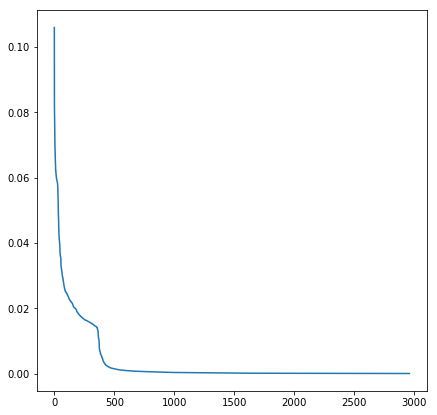

In [187]:
#plt.plot(t,importances,'r') 
importances=sum(imp)
importances_sort=np.sort(importances)[::-1]
plt.plot(range(len(importances_sort)),importances_sort)
print(sum(importances>0.00001))
print(sum(importances>0.00005))
print(sum(importances>0.0001))
print(sum(importances>0.0005))
print(sum(importances>0.001))

In [94]:
# ##feature selection by tuning RandomForestClassifier
# # Instantiate the CV and RF                                                                     
# kf = KFold(n_splits=5, shuffle=True,random_state=0)                                                                          
# # rf = RandomForestClassifier(n_jobs=-1,n_estimators=500,oob_score=True,max_features="sqrt", random_state=0)
# rf = RandomForestClassifier(n_jobs=-1,n_estimators=500,oob_score=True,max_features=0.4,max_depth=20, random_state=0)

# preds1=np.zeros((train.shape[0],9))

# #denom = 0                                                                                                
# for tr_idx, te_idx in kf.split(train):                                                      
#     # train                                                                                     
#     rf.fit(train[tr_idx,:], y[tr_idx])                                              
#     # predict                                                                                   
#     preds1[te_idx,:] = rf.predict_proba(train[te_idx,:]) #predict(iris.data[te_idx])                                                        
#     oob_error = 1 - rf.oob_score_
#     print(oob_error)
# #     pred = rf.predict_proba(test)
# #     if denom != 0:        
# #         preds += pred
# #     else:        
# #         preds = pred.copy()
# #     denom += 1
# # preds /= denom
# # np.savetxt('test_preds_RF_fold_'  + str(denom) + '.txt', preds)
# # np.savetxt('train_preds_RF_fold_'  + str(denom) + '.txt', preds1)
# print(log_loss(np.array(y),np.array(preds1)))
# #'train2734.txt'
# #max_features="sqrt" 0.9248
# #max_features=0.1, 0.890869728693
# #max_features=0.2  0.898875207776
# #'train2959.txt'
# #max_features=0.05  0.981296432429
# #max_features=0.1, 0.944583962315
# #max_features=0.2  0.930992481086 due to more % useful features
# #max_features=0.3  0.928734055471
# #max_features=0.4  0.912923241119
# #max_features=0.5  0.914723769535
# #####################
# #max_features=0.4,max_depth=15, 
# # 0.909051901691
# #max_features=0.4,max_depth=20, 
# #0.895726985073
# #max_features=0.4,max_depth=25, 
# #0.895984051886

0.305722891566
0.308242378623
0.305984192699
0.30109145653
0.305231464057
0.895726985073


In [188]:
# importances_sort=np.sort(importances)[::-1]
# plt.plot(range(len(importances_sort)),importances_sort)
print(sum(importances_sort==0))

print(importances_sort[500])
print(importances_sort[1000])
print(importances_sort[1500])
print(importances_sort[2000])

310
0.00141003540008
0.000315054610898
0.0001110383038
4.70963619111e-05


##  PCA for dropped columns

In [189]:
#min(indices)
thres=0.0005
ind_drop=indices[(importances<thres)]
print(ind_drop.shape)

print(train[:,ind_drop].shape)

# from sklearn.decomposition import PCA, FastICA, TruncatedSVD
# from sklearn.random_projection import GaussianRandomProjection
# from sklearn.random_projection import SparseRandomProjection
from sklearn.decomposition import PCA   
pca=PCA(n_components=10)  #PCA(n_components='mle') 
newtrain=pca.fit_transform(train[:,ind_drop])  
print(pca.explained_variance_ratio_)  
#for test, apply same pca
newtest=pca.transform(test[:,ind_drop])  #newtest=pca.fit_transform(test)  

(2148,)
[  9.99949338e-01   3.11836902e-05   2.70575548e-06   2.09089375e-06
   1.95036698e-06   1.54813483e-06   1.44744215e-06   8.12541992e-07
   7.00801148e-07   6.07232084e-07]


In [200]:
# # train_full=train
# # test_full=test
train=train_full
test=test_full

train_full.shape

(3321, 2959)

In [201]:
select_column=indices[0:sum((importances)>thres)]
train=train_full[:,select_column]
test=test_full[:,select_column]
# train=np.concatenate((train_full[:,select_column], newtrain),axis=1)
# test=np.concatenate((test_full[:,select_column], newtest),axis=1)

print(train.shape)
print(test.shape)
# np.savetxt('train671.txt', train)
# np.savetxt('test671.txt', test)

(3321, 811)
(5668, 811)


In [205]:
# # np.savetxt('train678.txt', train)
# # np.savetxt('test678.txt', test)
# np.savetxt('train811.txt', train)
# np.savetxt('test811.txt', test)

# 2nd RF with fewer features

In [203]:
kf = KFold(n_splits=5, shuffle=True,random_state=0)                                                                          
# rf = RandomForestClassifier(n_jobs=-1,n_estimators=500,oob_score=True,max_features="sqrt", random_state=0)
rf = RandomForestClassifier(n_jobs=-1,n_estimators=500,oob_score=True,max_features=0.25,max_depth=15, random_state=0)

preds1=np.zeros((train.shape[0],9))

#denom = 0                                                                                                
for tr_idx, te_idx in kf.split(train):                                                      
    # train                                                                                     
    rf.fit(train[tr_idx,:], y[tr_idx])                                              
    # predict                                                                                   
    preds1[te_idx,:] = rf.predict_proba(train[te_idx,:]) #predict(iris.data[te_idx])                                                        
    oob_error = 1 - rf.oob_score_
    print(oob_error)
#     pred = rf.predict_proba(test)
#     if denom != 0:        
#         preds += pred
#     else:        
#         preds = pred.copy()
#     denom += 1
# preds /= denom
# np.savetxt('test_preds_RF_fold_'  + str(denom) + '.txt', preds)
# np.savetxt('train_preds_RF_fold_'  + str(denom) + '.txt', preds1)
print(log_loss(np.array(y),np.array(preds1)))
#'train671.txt' max_features=0.1
#0.895365186154  

0.302710843373
0.307866014302
0.301844185171
0.299962363568
0.298833270606
0.891789433695


652
528
463
375
363


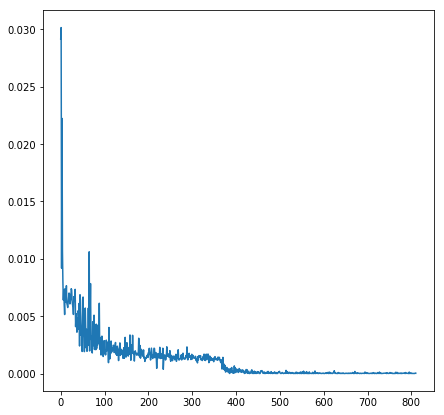

In [204]:
# # train with all train data to get feature_importances2_
# #rf = RandomForestClassifier(n_jobs=-1,n_estimators=500,oob_score=True,max_features=0.25, random_state=0)
# rf.fit(train, y)
importances2 = rf.feature_importances_
print(sum((importances2)>0.00001))
print(sum((importances2)>0.00005))
print(sum((importances2)>0.0001))
print(sum((importances2)>0.0005))
print(sum((importances2)>0.001))

plt.plot(range(len(importances2)),importances2)
plt.rcParams['figure.figsize'] = (7.0, 7.0)

In [193]:
importances2[-20:]

array([  2.55921479e-06,   4.28724050e-05,   0.00000000e+00,
         9.23500678e-06,   0.00000000e+00,   4.25459025e-06,
         1.10256223e-05,   1.79112381e-05,   6.89612637e-05,
         1.60811279e-05,   3.00416401e-03,   4.29520560e-03,
         5.50334685e-03,   4.90620290e-03,   5.18112838e-03,
         5.63412383e-03,   5.65627635e-03,   7.72079052e-03,
         4.81979696e-03,   5.06760333e-03])

## xgboost

In [ ]:
dtrain = xgb.DMatrix(train, y)
dtest = xgb.DMatrix(test)

# # # reproducibility
# seed = 342
# np.random.seed(seed)
import csv
best_score=2

denom = 0
fold = 100
for i in np.array(range(fold)):
    np.random.seed( i) 
    params = {
        'objective': 'multi:softprob',
        'eval_metric': 'mlogloss',
        'num_class': 9,
        'seed': np.random.randint(1,10000),#i,
        'silent': True#,
    }
    params['nthread'] = -1#28#
    params['min_child_weight'] = np.random.randint(2,8)#np.random.randint(2,10)
    params['eta'] = np.random.uniform(0.015,0.04)
    params['max_depth'] = np.random.randint(4,13)#np.random.randint(8,15)#
#     params['subsample'] = np.random.uniform(0.8,1)
#     params['colsample_bytree'] = np.random.uniform(0.5,1)
    
    score = xgb.cv(params, dtrain, 1500, nfold=5, verbose_eval=500, early_stopping_rounds=100)
    score1=score.iloc[-1,0]
    print(score1)
    print(i)
    print(params)
    
    if score1 < best_score:
        np.save('best_params_fold_'  + str(i) + '.npy', params) 
        best_score=score1
        best_params=params
        best_nround=score.iloc[:,0].idxmin()
        #min(score.iloc[:,0])

watchlist= [(dtrain, 'train')]
model = xgb.train(best_params, dtrain, best_nround,  watchlist, verbose_eval=50, early_stopping_rounds=100)
preds = model.predict(dtest, ntree_limit=model.best_ntree_limit)

submission = pd.DataFrame(preds, columns=['class'+str(c+1) for c in range(9)])
submission['ID'] = pid
submission.to_csv('submission_xgb_cv.csv', index=False)


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['figure.figsize'] = (7.0, 7.0)
xgb.plot_importance(booster=model); plt.show()